In [209]:
# Se importan las librerias necesarias.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [210]:
# Cargamos el archivo.

df = pd.read_csv('https://raw.githubusercontent.com/gegrinberg/curso_data_BCGL/main/resources/winequality.csv')

In [211]:
# Analizamos el tipo de estructura del dataset para ver si es un dataframe.

type(df)

pandas.core.frame.DataFrame

In [212]:
# Analizo el shape de mi dataframe

df.shape

(1599, 12)

In [213]:
# Listamos el nombre de las columnas del dataframe.

print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [214]:
# Obtenemos la totalidad de registros para cada columna del dataframe.

df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [215]:
# Analizamos el tipo de datos de cada columna del dataframe
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [216]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


El dataset brinda distintas caracteristicas fisicoquimicas de los vinos y en la ultima columna 'quality' nos da la calidad del vino. Tiene un total de 1599 datos para cada una de sus 12 columnas.

In [217]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

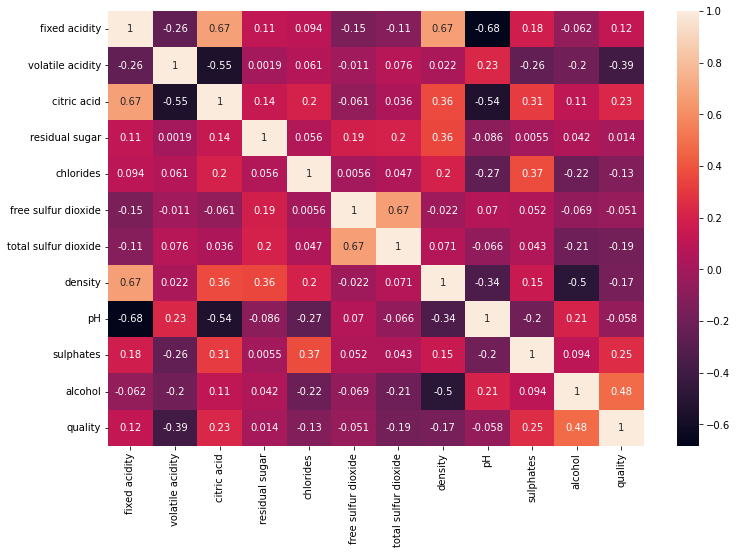

In [218]:
# Realizamos una tabla de correlaciones para obtener la correlación entre las distinas variables.
plt.figure(figsize=(12, 8))

df_corr = df.corr()
sns.heatmap(df_corr, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values, annot = True)

<AxesSubplot:title={'center':'quality Vs. alcohol'}, xlabel='quality', ylabel='alcohol'>

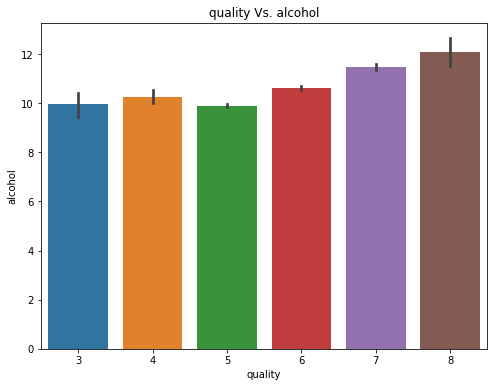

In [219]:
# La calidad del vino aumenta a medida que aumenta el nivel de alcohol (relación directa).

fig = plt.figure(figsize = (8,6))
plt.title('quality Vs. alcohol')
sns.barplot(x = 'quality', y = 'alcohol', data = df)

<AxesSubplot:title={'center':'quality Vs. volatile Acidity'}, xlabel='quality', ylabel='volatile acidity'>

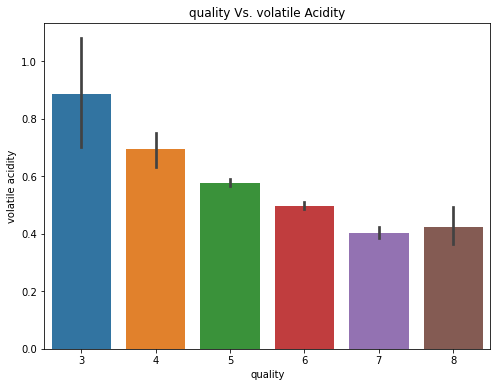

In [220]:
# La calidad del vino disminuye a medida que aumenta el nivel de acidez volatil (relación inversa).

fig = plt.figure(figsize = (8,6))
plt.title('quality Vs. volatile Acidity')
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:title={'center':'quality Vs. sulphates'}, xlabel='quality', ylabel='sulphates'>

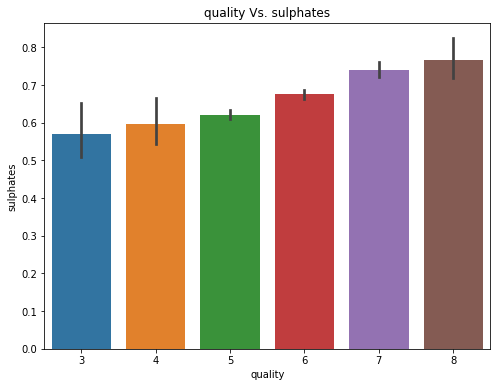

In [221]:
# La calidad del vino aumenta a medida que aumenta el nivel de sulfatos (relación directa).

fig = plt.figure(figsize = (8,6))
plt.title('quality Vs. sulphates')
sns.barplot(x = 'quality', y = 'sulphates', data = df)

In [222]:
# A continuación, clasifico el vino en 3 categorias: Malo, regular y bueno para simplificar el modelo.
# Aquellos vinos de entre 3 y 4 son malos.
# Aquellos vinos de entre 4 y 6 son regulares.
# Aquellos vinos de entre 7 y 8 son buenos.

group_names = ['malo','regular', 'bueno']
df['quality'] = pd.cut(df['quality'], bins = [2,4,6,8], labels = group_names)

In [223]:
df['quality'].value_counts()

regular    1319
bueno       217
malo         63
Name: quality, dtype: int64

In [224]:
# Separo entre X e y.

# Elimino de mi dataset la variable a predecir.
X = df.drop("quality", axis=1) 

# Defino el Target
y = df.quality 

In [225]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [226]:
y

0       regular
1       regular
2       regular
3       regular
4       regular
         ...   
1594    regular
1595    regular
1596    regular
1597    regular
1598    regular
Name: quality, Length: 1599, dtype: category
Categories (3, object): ['malo' < 'regular' < 'bueno']

In [227]:
# Me quedo con 30% para test y 70% para train.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [228]:
# Creo el modelo de arbol de decisiones.
tree = DecisionTreeClassifier(max_depth=2, random_state = 42, min_samples_split=10)

In [229]:
# Entreo el modelo.
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10, random_state=42)

In [230]:
# Predicciones en Train.
y_train_pred = tree.predict(X_train)


In [231]:
 # Prediccion en Test.
y_test_pred = tree.predict(X_test)

In [232]:
validacion = pd.DataFrame({'real':y_train, 'predicho':y_train_pred})
validacion

,real,predicho
925,bueno,regular
363,regular,regular
906,regular,regular
426,regular,regular
1251,regular,regular
...,...,...
1130,regular,regular
1294,regular,regular
860,regular,regular
1459,bueno,bueno


In [233]:
# Calculo el total de predicciones correctas.
(validacion['real'] == validacion['predicho']).sum()

958

In [234]:
# Calculo el total de predicciones realizadas.
len(validacion)

1119

In [235]:
# Calculo el porcentaje de acierto entre las predicciones realizadas y las predicciones correctas.
100*(validacion['real'] == validacion['predicho']).sum()/len(validacion)

85.61215370866846

El porcentaje de acierto de mi modelo en el dataset de entrenamiento es del 85.61%

In [236]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8561215370866846
% de aciertos sobre el set de evaluación: 0.8270833333333333


In [237]:
# Calculo las medias de cada columna de X para graficar un corte.
Xmeans=X.mean(axis=0)
Xmeans

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
dtype: float64

In [238]:
# Parameters
n_classes = 11
plot_colors = "br"
plot_step = 0.5

yplot=y
zplot=y
Xplot1=X[['alcohol','volatile acidity']]
Xplot2=X[['alcohol','sulphates']]

# Plot the decision boundary
plt.figure(figsize=(14,8))

x_min, x_max = Xplot1.iloc[:, 0].min() - 1, Xplot1.iloc[:, 0].max() + 1
y_min, y_max = Xplot1.iloc[:, 1].min() - 1, Xplot1.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


<Figure size 1008x576 with 0 Axes>

In [239]:
matrix_plot = np.c_[np.array([Xmeans['fixed acidity']]*119),
            np.array([Xmeans['volatile acidity']]*119),
            np.array([Xmeans['citric acid']]*119),      
            np.array([Xmeans['residual sugar']]*119),
            np.array([Xmeans['chlorides']]*119),
            np.array([Xmeans['free sulfur dioxide']]*119),
            np.array([Xmeans['total sulfur dioxide']]*119),
            np.array([Xmeans['density']]*119),                              
            np.array([Xmeans['pH']]*119),      
            np.array([Xmeans['sulphates']]*119),
            np.array([Xmeans['alcohol']]*119),
      ]

matrix_plot[:,10]=xx.ravel()  # Reemplazamos los valores de la media de alcohol por valores a plotear
matrix_plot[:,1]=yy.ravel()   # Reemplazamos los valores de la media de volatile acidity por valores a plotear      

In [240]:
matrix_plot = np.c_[np.array([X.iloc[1459,0]]*119),
            np.array([X.iloc[1459,1]]*119),
            np.array([X.iloc[1459,2]]*119),      
            np.array([X.iloc[1459,3]]*119),
            np.array([X.iloc[1459,4]]*119),
            np.array([X.iloc[1459,5]]*119),
            np.array([X.iloc[1459,6]]*119),
            np.array([X.iloc[1459,7]]*119),                              
            np.array([X.iloc[1459,8]]*119),      
            np.array([X.iloc[1459,9]]*119),
            np.array([X.iloc[1459,10]]*119),
      ]

matrix_plot[:,10]=xx.ravel()  # Reemplazamos los valores de la media de alcohol por valores a plotear
matrix_plot[:,1]=yy.ravel()   # Reemplazamos los valores de la media de volatile acidity por valores a plotear 

c:\Users\arniboc\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


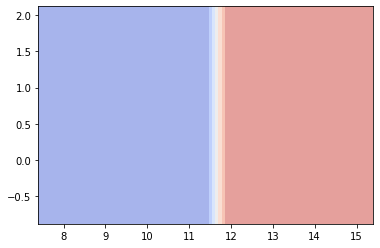

In [241]:
Z = tree.predict(matrix_plot)
Zplot = Z == 'bueno'
Zplot=Zplot.reshape(xx.shape)
# Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Zplot, cmap='coolwarm', alpha=0.5)


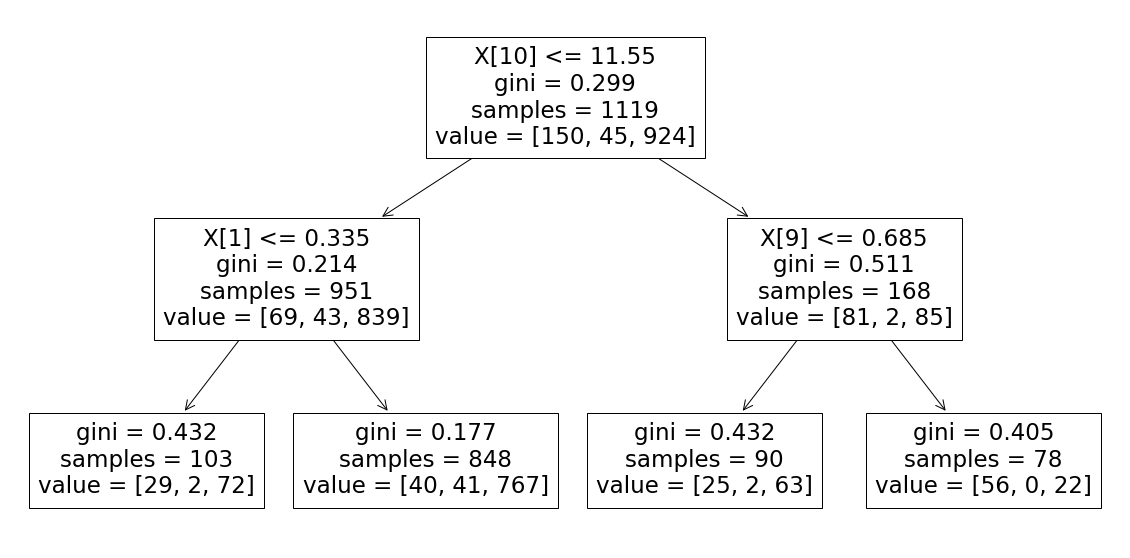

In [242]:
from sklearn import tree as lcdtm
plt.figure(figsize=(20,10))
lcdtm.plot_tree(tree)
plt.show()